In [ ]:
!unzip -d data "Data.zip"

Archive:  Data.zip
   creating: data/Data/
  inflating: data/Data/ais.csv       
  inflating: data/Data/boston_house.csv  
  inflating: data/Data/data.csv      
  inflating: data/Data/grade_data1.csv  
  inflating: data/Data/grade_data2.csv  
  inflating: data/Data/grade_data3.csv  
  inflating: data/Data/height_weight.csv  
  inflating: data/Data/height_weight_small.csv  
  inflating: data/Data/height_weight_small2.csv  
  inflating: data/Data/height_weight_small3.csv  
  inflating: data/Data/iris.csv      
  inflating: data/Data/iris_2metrics1.csv  
  inflating: data/Data/iris_2metrics2.csv  
  inflating: data/Data/laborfor.csv  
  inflating: data/Data/predicti.csv  
 extracting: data/Data/some.csv      
  inflating: data/Data/temperature_data.csv  
  inflating: data/Data/temperature_data_NaN.csv  
  inflating: data/Data/temperature_FTK_August.csv  
  inflating: data/Data/temperature_FT_August.csv  
  inflating: data/Data/temperature_FT_August_pairs.csv  
  inflating: data/Data/test.

In [10]:
# 可視化
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # matplotlib (図) のスタイルを設定

data_dir = './data/'
# 温度データの入ったcsvを読み込み
temper_data=pd.read_csv(data_dir+"temperature_data.csv")
# 身長・体重データの入ったcsvを読み込み
HW_data=pd.read_csv(data_dir+"./height_weight.csv")

# データの中身をみる
print(temper_data.iloc[0])  # 0行目を表示
print(temper_data.iloc[:3])  # 0から2行目を表示
print(temper_data.iloc[:,0])  # 0列目を表示
print(temper_data.iloc[:,1:3])  # 1から2列目を表示

# 簡単な統計値を出す
print(temper_data.mean())  # 平均
print(temper_data.var())  # 分散
print(temper_data.std())  # 標準偏差
print(temper_data.describe())  # 各列ごとに平均や標準偏差，最大値，最小値等の様々な要約統計量

date       2016/1/1
Naha           18.1
Fukuoka         7.3
Sapporo        -1.1
Name: 0, dtype: object
       date  Naha  Fukuoka  Sapporo
0  2016/1/1  18.1      7.3     -1.1
1  2016/1/2  20.2     11.6      1.6
2  2016/1/3  21.2     11.6      0.3
0        2016/1/1
1        2016/1/2
2        2016/1/3
3        2016/1/4
4        2016/1/5
          ...    
361    2016/12/27
362    2016/12/28
363    2016/12/29
364    2016/12/30
365    2016/12/31
Name: date, Length: 366, dtype: object
     Naha  Fukuoka
0    18.1      7.3
1    20.2     11.6
2    21.2     11.6
3    19.8     11.0
4    22.5      9.9
..    ...      ...
361  18.5     10.7
362  16.9      6.8
363  17.9      6.8
364  17.9      6.6
365  19.3      7.3

[366 rows x 2 columns]
Naha       24.131421
Fukuoka    18.091803
Sapporo     9.295902
dtype: float64
Naha       24.559640
Fukuoka    62.146179
Sapporo    95.555079
dtype: float64
Naha       4.955768
Fukuoka    7.883285
Sapporo    9.775228
dtype: float64
             Naha     Fukuoka    

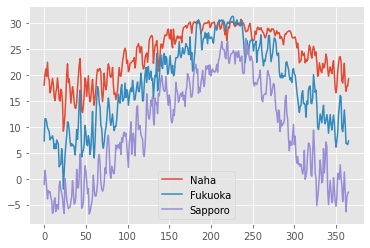

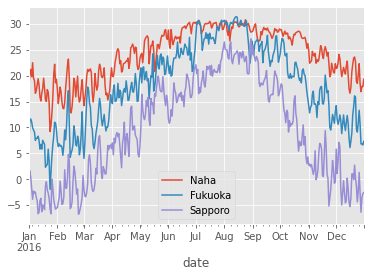

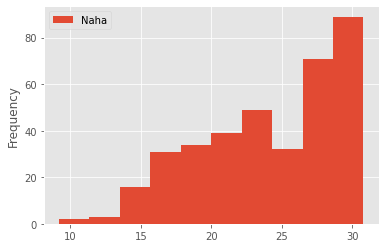

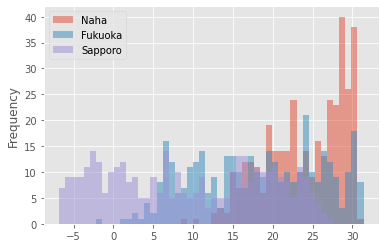

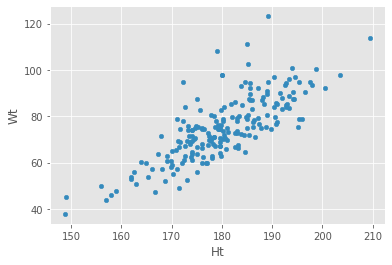

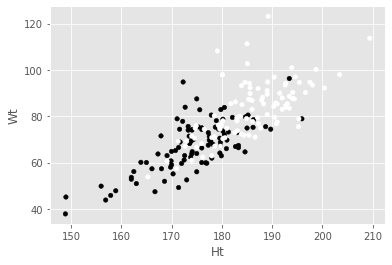

In [11]:
# 折れ線グラフ
temper_data.plot()

# 横軸を日付にした折れ線グラフ
temper_data.index = pd.to_datetime(temper_data.date)
temper_data.plot()

# ヒストグラム (横軸: 気温，縦軸: 頻度)
temper_data.plot(y='Naha', kind='hist')  # 那覇のデータ
temper_data.plot.hist(bins=50, alpha=0.5)  # bins: 棒の本数，alpha: 棒の透明度

# 散布図 (横軸: 身長，縦軸: 体重)
HW_data.plot(kind='scatter', x='Ht', y='Wt')  # kindで散布図 (scatter) を指定
HW_data.plot(kind='scatter', x='Ht', y='Wt', c=HW_data.Sex)  # 性別ごとに色分け

In [12]:
# 欠損値補完
temper_data2=pd.read_csv(data_dir+"temperature_data_NaN.csv")
# 欠損値のあるデータ（行）を取り除く
temper_data2.dropna(0)

,date,Naha,Fukuoka,Sapporo
0,2016/1/1,18.1,7.3,-1.1
1,2016/1/2,20.2,11.6,1.6
2,2016/1/3,21.2,11.6,0.3
3,2016/1/4,19.8,11.0,-1.7
4,2016/1/5,22.5,9.9,-3.9
...,...,...,...,...
361,2016/12/27,18.5,10.7,-2.5
362,2016/12/28,16.9,6.8,-6.4
363,2016/12/29,17.9,6.8,-3.6
364,2016/12/30,17.9,6.6,-2.8


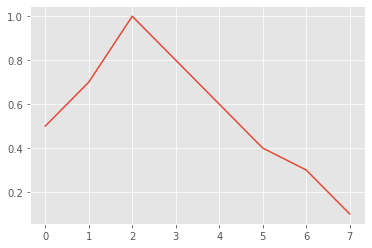

In [13]:
a = [0.5,0.7,1,0.8,0.6,0.4,0.3,0.1]
plt.plot(a)

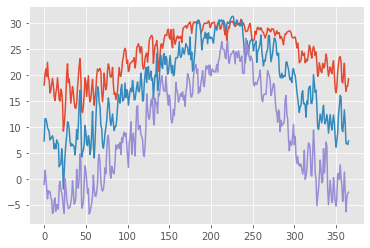

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 各地域のデータを個別に取得
Naha = temper_data.values[:,1]
Fukuoka = temper_data.values[:,2]
Sapporo = temper_data.values[:,3]

plt.plot(Naha)
plt.plot(Fukuoka)
plt.plot(Sapporo)

In [15]:
# 項目同士の関係性をまとめてプロット
import pandas as pd
# ";"を区切り文字としてcsvを読み込み
wine_data = pd.read_csv(data_dir+"winequality-red.csv", sep=";")
import seaborn as sns
sns.pairplot(wine_data)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# ベクトル
a=np.array([0,1,2])
print(a)

a=np.array([1,2,3,4,5])
b=np.array([2,2,3,3,4])
print(a+b)

a=np.array([1,2,3,4,5])
b=np.array([2,2,3,3,4])
print(a-b)

a=np.array([1,2,3,4,5])
print(2*a)

[0 1 2]
[3 4 6 7 9]
[-1  0  0  1  1]
[ 2  4  6  8 10]


In [17]:
#データ「セット」
a=np.array([1,2,3,4,5])
b=np.array([2,2,3,3,4])
c=np.array([5,4,2,3,3])

d=np.array([a,b,c])  # a, b, cを1つの行列にまとめる
print(d)

[[1 2 3 4 5]
 [2 2 3 3 4]
 [5 4 2 3 3]]
